In [111]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [112]:
#Import CDO and make sure it works
from cdo import *

#--Initialize CDO
cdo=Cdo()

%matplotlib inline
import os
import matplotlib.pyplot as plt
from matplotlib import cm as pltcm
from netCDF4 import Dataset
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import matplotlib.colors as colors
from collections import defaultdict

os.chdir('/vftmp/Jane.Baldwin/HW_REVIEW/')

In [122]:
direc = {'control':'/vftmp/Jane.Baldwin/HW_REVIEW/CONTROL/',
        '2xco2':'/vftmp/Jane.Baldwin/HW_REVIEW/2XCO2/',
        'threshold':'/vftmp/Jane.Baldwin/HW_REVIEW/THRESHOLD/'}

filename = {'control':'atmos_daily.04010101-04951231.t_ref_min.nc',
            '2xco2':'atmos_daily.04010101-04951231.t_ref_min.nc',
            'threshold':'threshold_0401-0430_90pcntl.nc'}

xm = -60.0217 #lon manaus
ym = -3.1190 #lat manaus
xc = -87.6298 #lon chicago
yc = 41.8781 #lat chicago

for key in ['control','2xco2']:
    cdo.remapnn('lon=%s/lat=%s' %(xm,ym), input = '-selyear,410/410 %s' %(direc[key]+filename[key]), options = '-f nc', output = 'tmin_'+key+'_'+'manaus.nc')
    cdo.remapnn('lon=%s/lat=%s' %(xc,yc), input = '-selyear,410/410 %s' %(direc[key]+filename[key]), options = '-f nc', output = 'tmin_'+key+'_'+'chicago.nc')
    
for key in ['threshold']:
    cdo.remapnn('lon=%s/lat=%s' %(xm,ym), input = '%s' %(direc[key]+filename[key]), options = '-f nc', output = 'tmin_'+key+'_'+'manaus.nc')
    cdo.remapnn('lon=%s/lat=%s' %(xc,yc), input = '%s' %(direc[key]+filename[key]), options = '-f nc', output = 'tmin_'+key+'_'+'chicago.nc')


In [123]:
#time = np.squeeze(Dataset('tmin_threshold_manaus.nc','r').variables['time'][:])
manaus_control = np.squeeze(Dataset('tmin_control_manaus.nc','r').variables['t_ref_min'][:])
manaus_2xco2 = np.squeeze(Dataset('tmin_2xco2_manaus.nc','r').variables['t_ref_min'][:])
manaus_threshold = np.squeeze(Dataset('tmin_threshold_manaus.nc','r').variables['tnpct'][:])
chicago_control = np.squeeze(Dataset('tmin_control_chicago.nc','r').variables['t_ref_min'][:])
chicago_2xco2 = np.squeeze(Dataset('tmin_2xco2_chicago.nc','r').variables['t_ref_min'][:])
chicago_threshold = np.squeeze(Dataset('tmin_threshold_chicago.nc','r').variables['tnpct'][:])

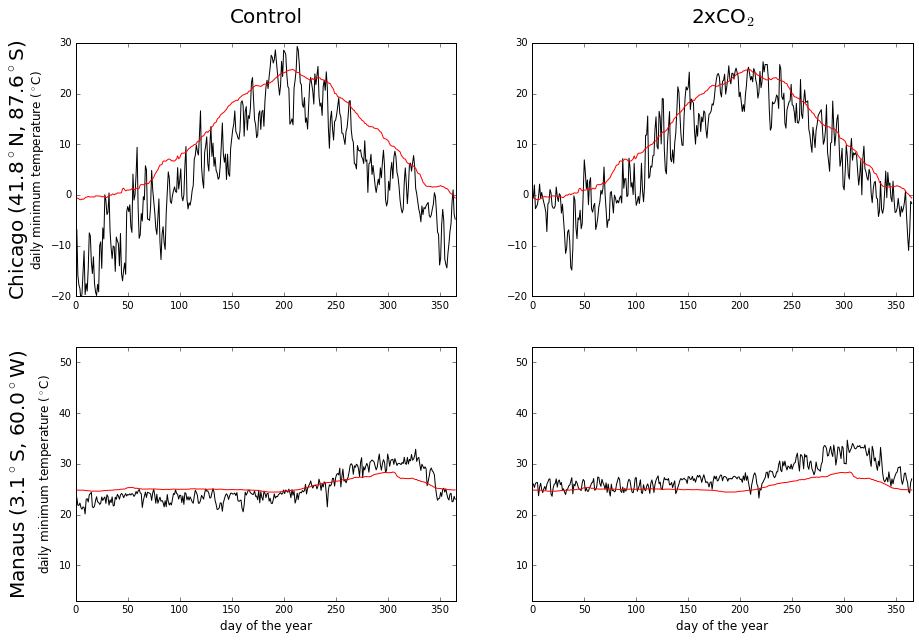

In [131]:
fs = 12

fig = plt.figure(figsize=(15,10))
time = np.arange(1,366,1)
ax1 = plt.subplot(2,2,1)
plt.plot(time,chicago_control-273.15,'k-')
plt.plot(time,chicago_threshold-273.15,'r-')
ax1.set_ylabel('daily minimum temperature ($^\circ$C)', fontsize = fs)
ax1.set_xlim([0,366])
ax1.set_ylim([-20,30])
ax1.text(0.5,1.1, "Control", transform=ax1.transAxes, fontsize=20, rotation='horizontal',ha='center',va='center')
ax1.text(-0.15,0.5, "Chicago (41.8$^\circ$N, 87.6$^\circ$S)", transform=ax1.transAxes, fontsize=20, rotation='vertical',ha='center',va='center')

ax2 = plt.subplot(2,2,2)
plt.plot(time,chicago_2xco2-273.15,'k-')
plt.plot(time,chicago_threshold-273.15,'r-')
ax2.set_xlim([0,366])
ax2.set_ylim([-20,30])
ax2.text(0.5,1.1, "2xCO$_2$", transform=ax2.transAxes, fontsize=20, rotation='horizontal',ha='center',va='center')


ax3 = plt.subplot(2,2,3)
plt.plot(time,manaus_control-273.15,'k-')
plt.plot(time,manaus_threshold-273.15,'r-')
ax3.set_xlabel('day of the year', fontsize = fs)
ax3.set_ylabel('daily minimum temperature ($^\circ$C)', fontsize = fs)
ax3.set_ylim([3,53])
ax3.set_xlim([0,366])
ax3.text(-0.15,0.5, "Manaus (3.1$^\circ$S, 60.0$^\circ$W)", transform=ax3.transAxes, fontsize=20, rotation='vertical',ha='center',va='center')

ax4 = plt.subplot(2,2,4)
plt.plot(time,manaus_2xco2-273.15,'k-')
plt.plot(time,manaus_threshold-273.15,'r-')
ax4.set_xlabel('day of the year', fontsize = 12)
ax4.set_ylim([3,53])
ax4.set_xlim([0,366])

#plt.tight_layout(pad = 8)

plt.savefig('localheatwaves_year410.pdf')

plt.show()